# Implementing LOGISTIC, KNN, DECISION TREE & RANDOM FOREST Classification

## Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

In [2]:
# Reviewing the given Dataset
dt = pd.read_csv("dataset.csv")
dt.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


## Indentifying dataset 

In [3]:

dt.shape

(569, 32)

In [4]:
dt.drop(['id'],axis = 1, inplace = True) # Droping the I'd as it is not important for an anayalsis

In [5]:
dt.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [6]:
dt.columns 

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [7]:
dt.nunique()

diagnosis              2
radius_mean          456
texture_mean         479
perimeter_mean       522
area_mean            539
smoothness_mean      474
compactness_mean     537
concavity_mean       537
points_mean          542
symmetry_mean        432
dimension_mean       499
radius_se            540
texture_se           519
perimeter_se         533
area_se              528
smoothness_se        547
compactness_se       541
concavity_se         533
points_se            507
symmetry_se          498
dimension_se         545
radius_worst         457
texture_worst        511
perimeter_worst      514
area_worst           544
smoothness_worst     411
compactness_worst    529
concavity_worst      539
points_worst         492
symmetry_worst       500
dimension_worst      535
dtype: int64

In [8]:
dt['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
# Replacing the diagnosis data into integer format to analysis better
new = {"diagnosis":{"B":1,"M":0}}
dt = dt.replace(new)
dt.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,1,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,1,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,1,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,1,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


C:\Users\Rutvik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

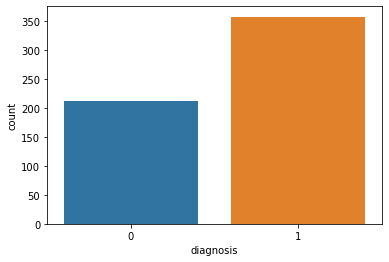

In [10]:
sns.countplot(dt['diagnosis'],label='Count')

### Here, 1 refer to B which mean begining stage of breast cancer which is higher than 0 (M) malignant stage as we see in diagnosis graph.

In [11]:
dt.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    int64  
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

In [13]:
dt.isna().sum()

diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

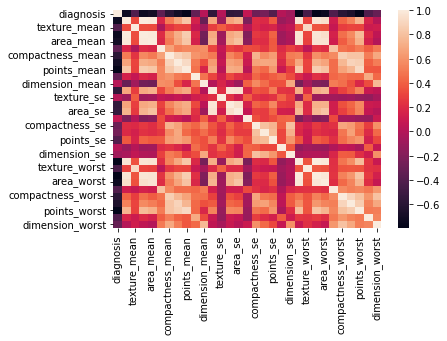

In [14]:
#correlation matrix
sns.heatmap(dt.corr())
plt.savefig("one.png")

In [15]:
#sns.pairplot(data=dt)
#plt.show()

## Exploratory data Analysis (EDA)

In [16]:
# This directly open html page which will have detail review of each data from dataset
report = sv.analyze(dt,target_feat= "diagnosis")
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Spliting the Dataset for Trainning and Testing for Classification

In [17]:
X = dt.drop('diagnosis',axis=1)
y = dt['diagnosis']

In [18]:
# Importing training and testing from sklearn model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.40, random_state = 0)

In [19]:
# Importing standarad scaler
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## Logistic Regression Classification

In [20]:
from sklearn.linear_model import LogisticRegression
lrg = LogisticRegression()
lrg.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred = lrg.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, lrg.predict(X_train)))
lrg_accuracy = accuracy_score(y_test, lrg.predict(X_test))
print(lrg_accuracy)

0.9882697947214076
0.9780701754385965


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        77
           1       0.98      0.99      0.98       151

    accuracy                           0.98       228
   macro avg       0.98      0.97      0.98       228
weighted avg       0.98      0.98      0.98       228



In [24]:
print(confusion_matrix(y_test,y_pred))

[[ 74   3]
 [  2 149]]


## KNN Classification

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn.predict(X_test)

In [27]:
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test,knn.predict(X_test))
print(knn_acc)

0.9648093841642229
0.9605263157894737


In [28]:
print(confusion_matrix(y_test,y_pred))

[[ 72   5]
 [  4 147]]


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        77
           1       0.97      0.97      0.97       151

    accuracy                           0.96       228
   macro avg       0.96      0.95      0.96       228
weighted avg       0.96      0.96      0.96       228



## Decision Tree Classification

In [30]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()
dec.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
y_predict = dec.predict(X_test)

In [32]:
print(accuracy_score(y_train, dec.predict(X_train)))
dec_acc = accuracy_score(y_test, dec.predict(X_test))
print(dec_acc)

1.0
0.8903508771929824


In [33]:
print(confusion_matrix(y_test,y_predict))

[[ 61  16]
 [  9 142]]


In [34]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        77
           1       0.90      0.94      0.92       151

    accuracy                           0.89       228
   macro avg       0.89      0.87      0.87       228
weighted avg       0.89      0.89      0.89       228



## Random Forest Classification

In [35]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
y_predict = random.predict(X_test)

In [37]:
print(accuracy_score(y_train,random.predict(X_train)))
random_acc= accuracy_score(y_test, random.predict(X_test))
print(random_acc)

1.0
0.9692982456140351


In [38]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        77
           1       0.97      0.99      0.98       151

    accuracy                           0.97       228
   macro avg       0.97      0.96      0.97       228
weighted avg       0.97      0.97      0.97       228



In [39]:
print(confusion_matrix(y_test,y_predict))

[[ 72   5]
 [  2 149]]


# Logistic Regression is the best regression model as we already compare with every model and it has best accuracy while using breast cancer  dataset.